### We import the libraries we are going to use.

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Transform datasets into dataframes
calendar = pd.read_csv('./datasets/New_calendar.csv')
listings = pd.read_csv('./datasets/New_listings.csv')
reviews = pd.read_csv('./datasets/New_reviews.csv')

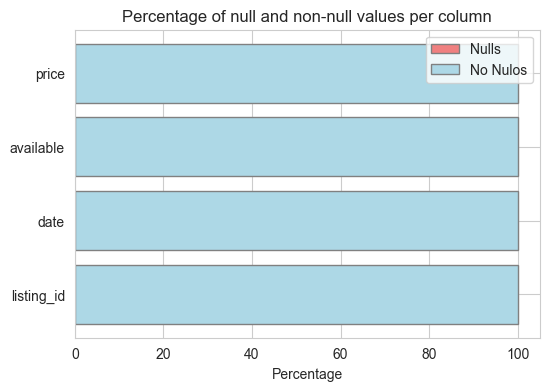

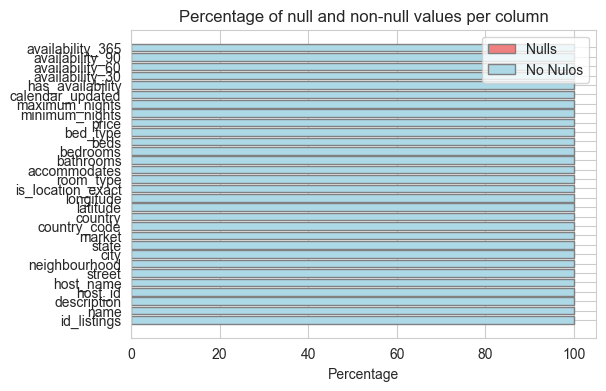

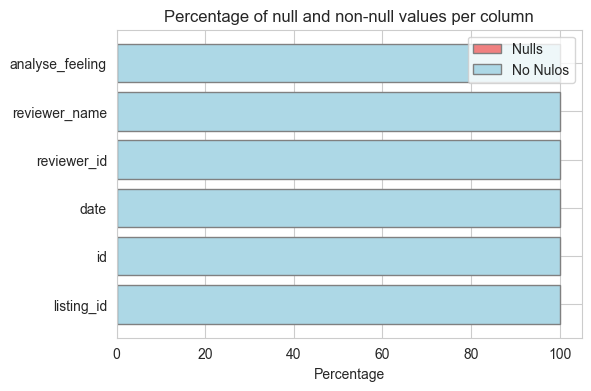

In [24]:
def plot_null_values(df):
    # We count null and non-null values per column
    null_counts = df.isnull().sum()
    non_null_counts = df.notnull().sum()

    # We will calculate the percentages
    total_counts = null_counts + non_null_counts
    null_percentage = (null_counts / total_counts) * 100
    non_null_percentage = (non_null_counts / total_counts) * 100

    # We will set the size of the graph
    fig, ax = plt.subplots(figsize=(6, 4))

    # We will create the stacked bars
    bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulls')
    bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightblue', edgecolor='grey', label='No Nulos')

    # We add tags and title
    ax.set_xlabel('Percentage')
    ax.set_title(f'Percentage of null and non-null values per column')
    ax.legend()

    # We will show the graph
    plt.show()
     

# We use the function to display the graphs.
plot_null_values(calendar)
plot_null_values(listings)
plot_null_values(reviews)
     


In [25]:
# We make sure the 'date' column is in datetime format
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# We extract the year and create a new column 'year'.
calendar['year'] = calendar['date'].dt.year

In [26]:
calendar.head()

,listing_id,date,available,price,year
0,50778,2020-04-26,unavailable,"$2,655.00",2020
1,133654,2020-04-27,available,"$1,150.00",2020
2,133654,2020-04-28,available,"$1,150.00",2020
3,133654,2020-04-29,available,"$1,150.00",2020
4,133654,2020-04-30,available,"$1,150.00",2020


In [27]:
# We convert the 'price' column to numeric format
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)

# We group by 'year' and calculate average price
price_by_year = calendar.groupby('year')['price'].mean().reset_index()

### Let's graph the table

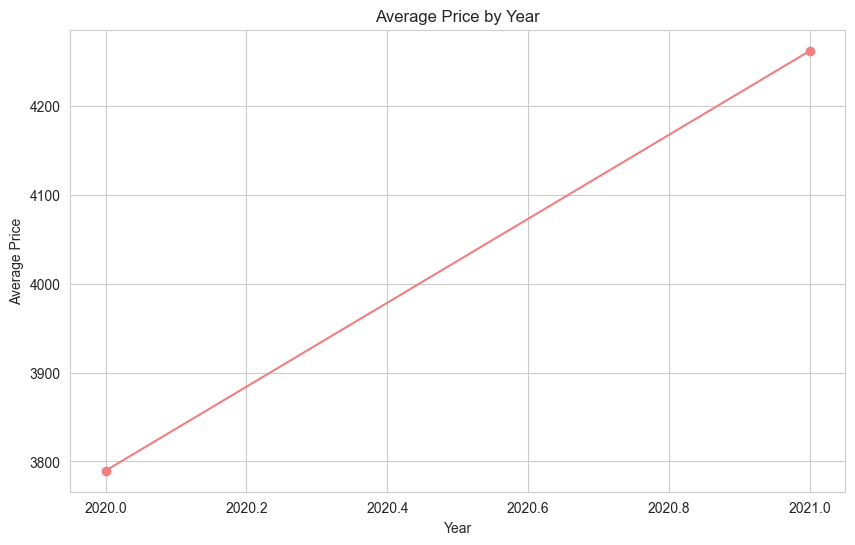

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(price_by_year['year'], price_by_year['price'], marker='o', linestyle='-', color='lightcoral')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.grid(True)
plt.show()

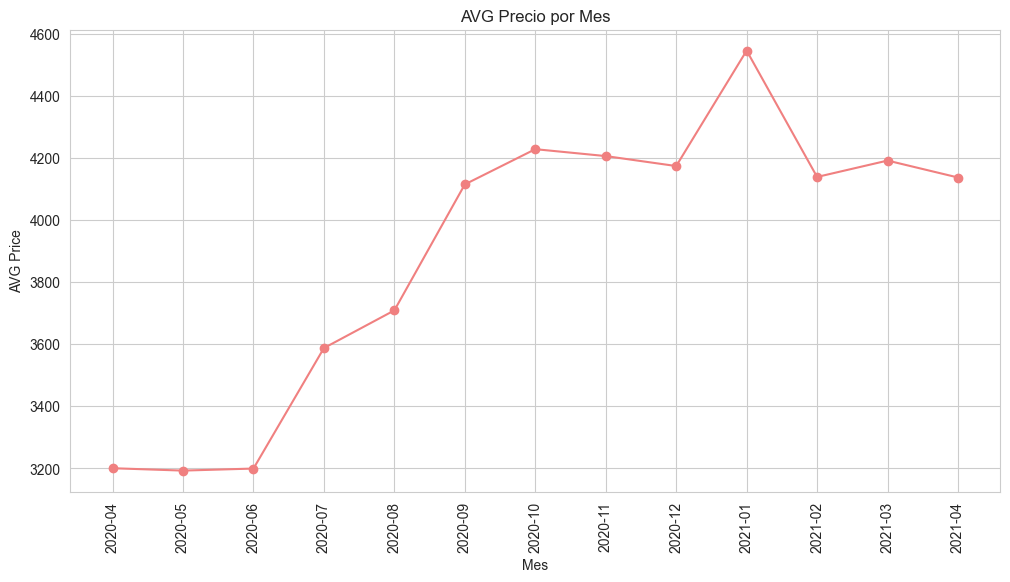

In [29]:
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# We extract the month and year to add to the column 'year'.
calendar['month'] = calendar['date'].dt.to_period('M')

# We group by 'month' and calculate the average price.
price_by_month = calendar.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(price_by_month['month'].astype(str), price_by_month['price'], marker='o', linestyle='-', color='lightcoral')
plt.xlabel('Mes')
plt.ylabel('AVG Price')
plt.title('AVG Precio por Mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

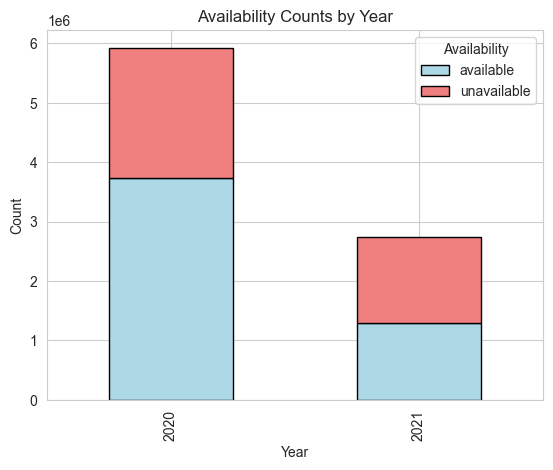

In [30]:
availability_counts = calendar.groupby(['year', 'available']).size().unstack()

plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Availability Counts by Year')
plt.legend(title='Availability')
plt.grid(True)
plt.show()




In [31]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,analyse_feeling
0,11508,1615861,02-07-2012,877808,Charlie,2
1,11508,3157005,26-12-2012,656077,Shaily,2
2,11508,3281011,05-01-2013,2835998,Michiel,2
3,11508,6050019,28-07-2013,4600436,Tara,2
4,11508,9328455,22-12-2013,3130017,Simon,2


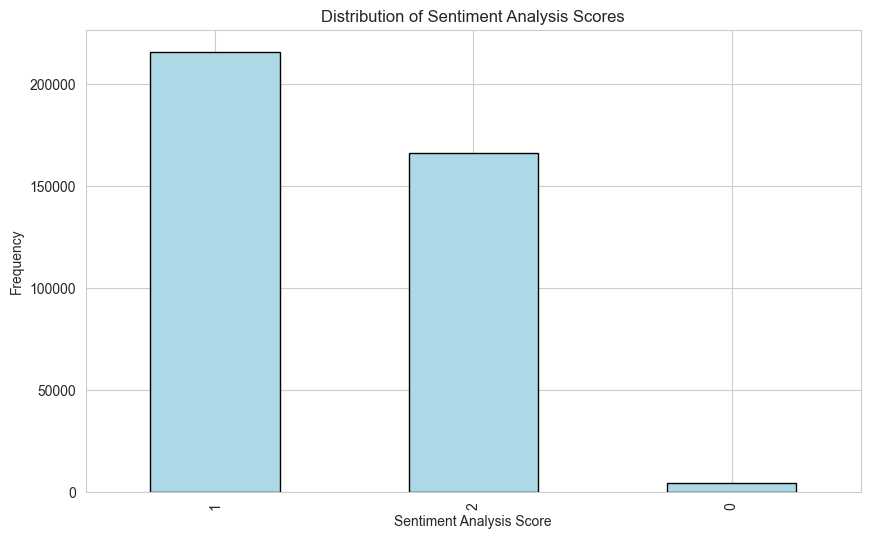

In [32]:
plt.figure(figsize=(10, 6))
reviews['analyse_feeling'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Sentiment Analysis Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Analysis Scores')
plt.grid(True)
plt.show()


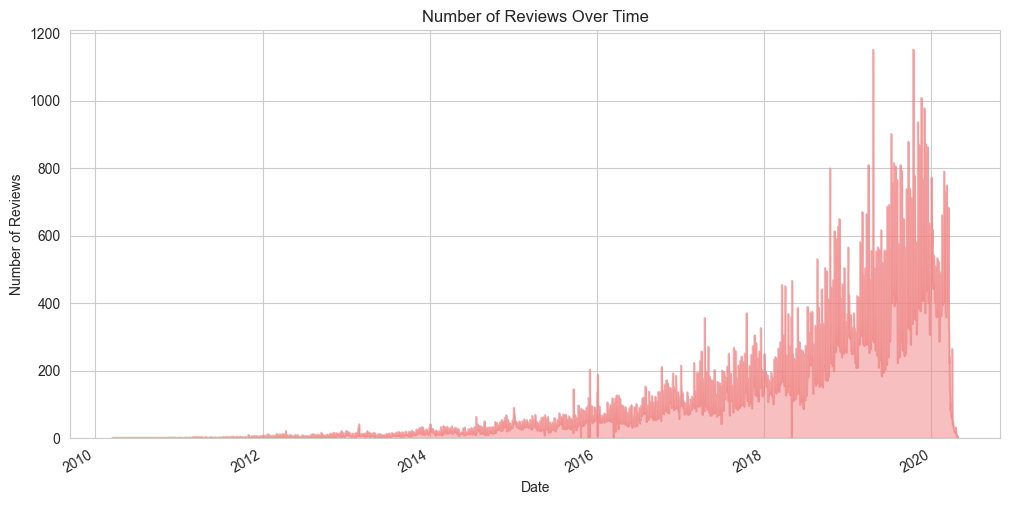

In [33]:
# Make sure you have your data converted to datetime.
reviews['date'] = pd.to_datetime(reviews['date'], format='%d-%m-%Y', errors='coerce')

# Count the number of reviews by date
reviews_per_date = reviews.groupby('date').size()

plt.figure(figsize=(12, 6))
reviews_per_date.plot(kind='area', color='lightcoral', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.grid(True)
plt.show()

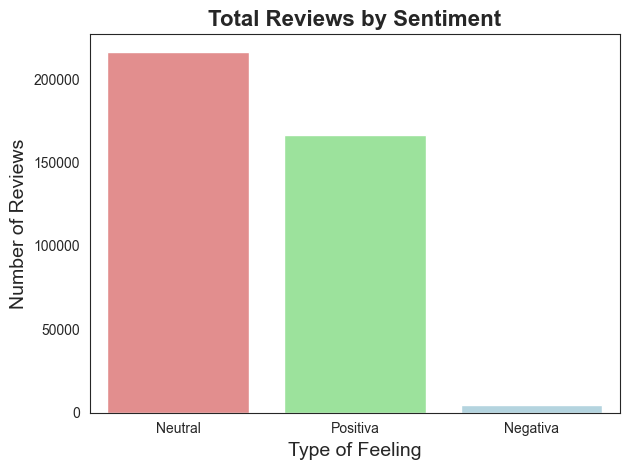

In [34]:
# Contar la cantidad de reseñas para cada tipo de sentimiento
sentiment_counts = reviews['analyse_feeling'].value_counts()

totals_df = pd.DataFrame({'Sentimiento': sentiment_counts.index, 'Total': sentiment_counts.values})

rename_dict = {
    0: 'Negativa',  
    1: 'Neutral',  
    2: 'Positiva'
}
totals_df['Sentimiento'] = totals_df['Sentimiento'].replace(rename_dict)


sns.set_style("white")
colors = ['lightcoral', 'lightgreen', 'lightblue'] 
sns.barplot(x='Sentimiento', y='Total', data=totals_df, palette=colors)
plt.title('Total Reviews by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Type of Feeling', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21984 entries, 0 to 21983
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_listings        21984 non-null  int64  
 1   name               21984 non-null  object 
 2   description        21984 non-null  object 
 3   host_id            21984 non-null  int64  
 4   host_name          21984 non-null  object 
 5   street             21984 non-null  object 
 6   neighbourhood      21984 non-null  object 
 7   city               21984 non-null  object 
 8   state              21984 non-null  object 
 9   market             21984 non-null  object 
 10  country_code       21984 non-null  object 
 11  country            21984 non-null  object 
 12  latitude           21984 non-null  float64
 13  longitude          21984 non-null  float64
 14  is_location_exact  21984 non-null  object 
 15  room_type          21984 non-null  object 
 16  accommodates       219

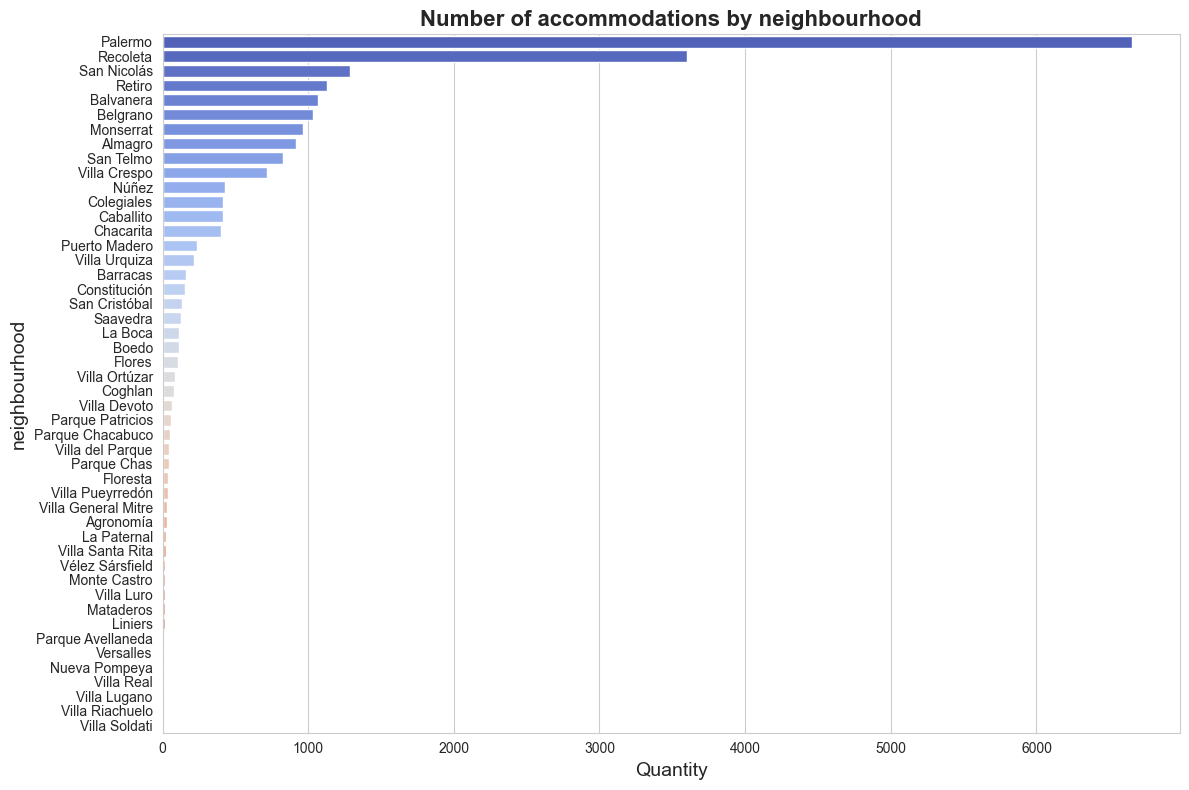

In [36]:
# Count the number of accommodations for each neighbourhood.
neighbourhood_counts = listings['neighbourhood'].value_counts()
neighbourhood_df = pd.DataFrame({'Barrio': neighbourhood_counts.index, 'Cantidad': neighbourhood_counts.values})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad', y='Barrio', data=neighbourhood_df, palette='coolwarm')
plt.title('Number of accommodations by neighbourhood', fontsize=16, fontweight='bold')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('neighbourhood', fontsize=14)
plt.tight_layout()
plt.show()

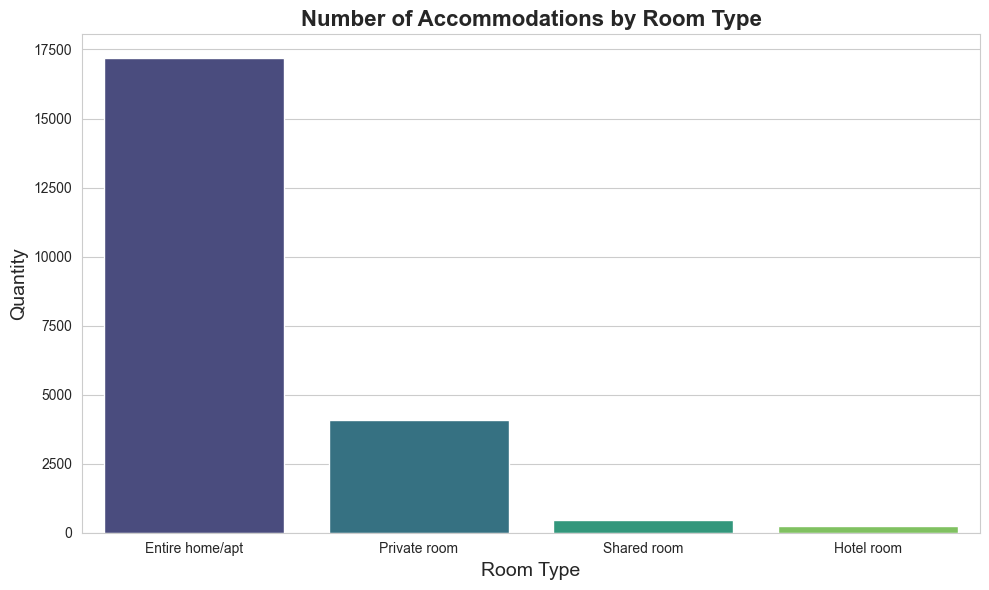

In [37]:

# Count the number of accommodations for each room type
room_type_counts = listings['room_type'].value_counts()
room_type_df = pd.DataFrame({'Tipo de Habitación': room_type_counts.index, 'Cantidad': room_type_counts.values})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Habitación', y='Cantidad', data=room_type_df, palette='viridis')
plt.title('Number of Accommodations by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.tight_layout()
plt.show()

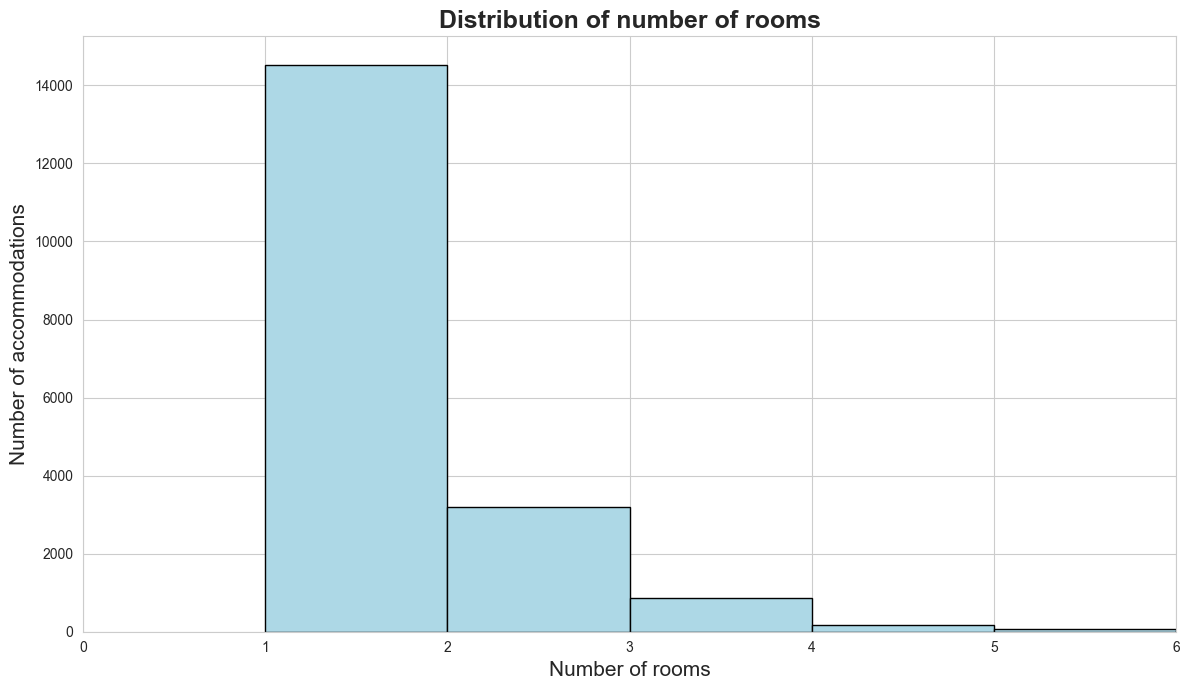

In [38]:
# We will create the histogram for the column 'bedrooms'.
plt.figure(figsize=(12, 7))
plt.hist(listings['bedrooms'].dropna(), bins=range(1, int(listings['bedrooms'].max()) + 2), color='lightblue', edgecolor='black')


plt.xlim(0, 6) 
plt.title('Distribution of number of rooms', fontsize=18, fontweight='bold')
plt.xlabel('Number of rooms', fontsize=15)
plt.ylabel('Number of accommodations', fontsize=15)
plt.tight_layout()
plt.show()

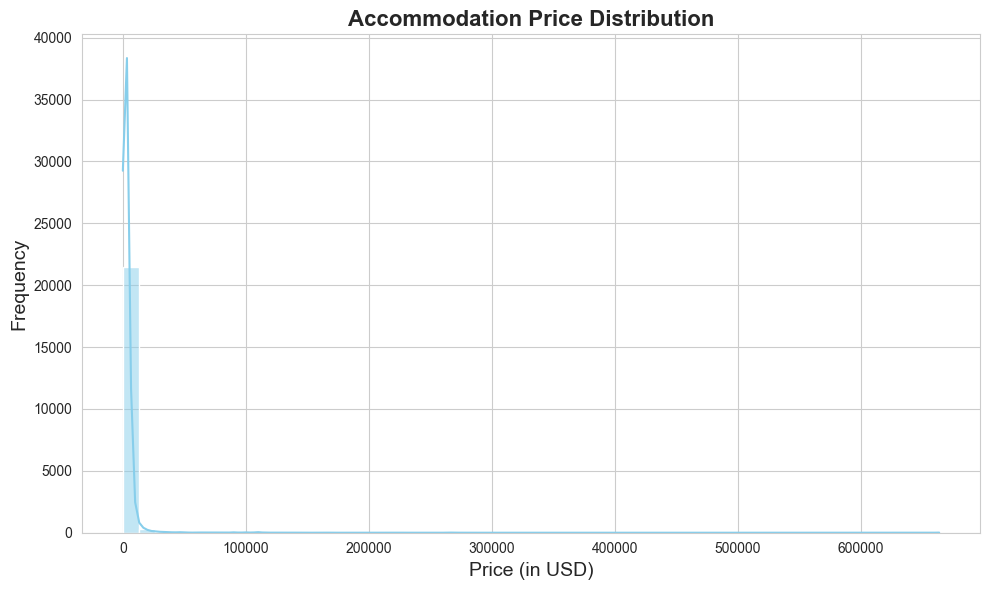

In [44]:

#We Convert the column 'price' to numeric (remove the $ sign and commas)
listings['price'] = listings['price'].replace('[$,]', '', regex=True).astype(float)

# We will set the style of the chart
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, color='skyblue', kde=True)
plt.title('Accommodation Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

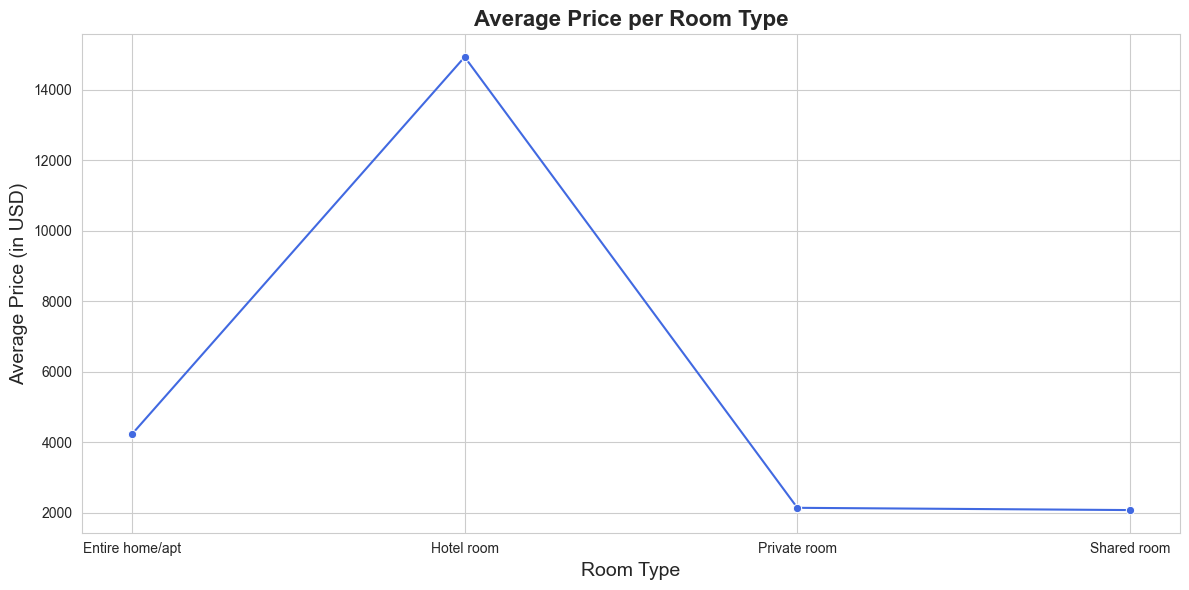

In [45]:
# We will group the data by 'room_type' and calculate the average price.
room_type_avg_price = listings.groupby('room_type')['price'].mean().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='room_type', y='price', data=room_type_avg_price, marker='o', color='royalblue')
plt.title('Average Price per Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Price (in USD)', fontsize=14)
plt.tight_layout()
plt.show()

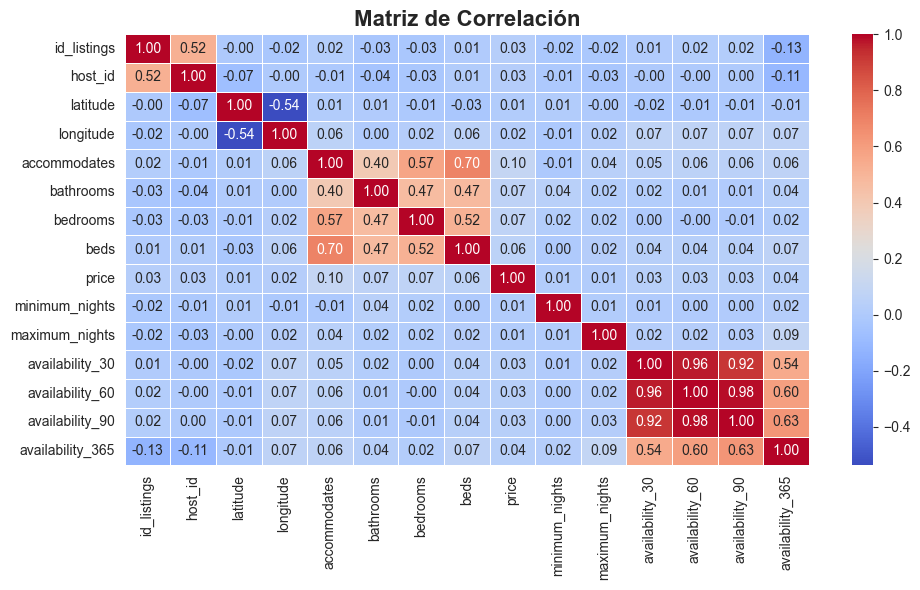

In [46]:
# Select only the numeric columns
numeric_df = listings.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Define the size of the figure
figsize = (10, 6)

# Creates the correlation matrix graph
plt.figure(figsize=figsize)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add the title
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')

# Display the graph
plt.tight_layout()
plt.show()